graded transcript sooner than later for testing our proof of concept of the ability to graphically depict the bayesian estimator and individual LRs in series using our quintile system.

Graphically Depict: 

Bayesian estimator
Individual LRs using quintile system: 

=> 

play around with the LRs in "Column E" to operationalize these metrics

asked 22 questions in this interview. Whether or not they captured key features for each "node" or "diagnosis" is designated in Column A as a "Y" (yes) or "N" (no). 

You'll notice the key features are weighted according to our major vs minor scales. The excel sheet multiplies major features in the positive direction by 6, major features in the negative direction by 3, minor features in the positive direction by 2, and minor features in the negative direction by 1. 


Diagnostic Framework Node 
Pre-test quintile 
Expert's post-test quintiles
PGY1's
post-test quintiles 
Cardiac 
40-60 
0-20 
  40-60
GERD 
40-60 
40-60 
             40-60
Esophageal Dysphagia 
40-60 
80-100 
             80-100
CREST 
0-20 
80-100 
             20-40
RA 
0-20 
20-40 
             0-20

The colored scales have arbitrary cut-offs, so just ignore them if they are confusing (they don't necessarily map to a quintile

In [ ]:
A few questions to consider...
First, do the bayesian LRs end up in the same quintile as our major / minor model? 
Second, how might we operationalize a multi-variable Bayesian estimator of total uncertainty reduction across the 22 question interview?
Third, can we create a proof of concept (or code within excel) that automates bayesian calculations by question?

Any other thoughts on what data you think might be informative? 

Finally, the GERD LRs in Table 1 confused me because they didn't seem to go in an intuitive direction (e.g. Hoarseness has a -LR of 0.82?). As a result, I did not include the lit based LRs for that sheet and instead used the regression to the mean method. Would you mind taking a look at these 2 references to see if you can make sense of them?

In [2]:
from os.path import basename, exists
import utils

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://raw.githubusercontent.com/AllenDowney/ElementsOfDataScience/v1/utils.py')

Downloaded utils.py


In [4]:
import pandas as pd
from skimpy import skim

download('https://github.com/AllenDowney/ElementsOfDataScience/' +
         'raw/v1/data/gss_extract_2022.hdf');
gss = pd.read_hdf('gss_extract_2022.hdf', 'gss')
skim(gss)
gss.head()


Downloaded gss_extract_2022.hdf


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 72390  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA      ┃ NA %   ┃ mean   ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ year          │       0 │      0 │   1998 │    15.11 │  1972 │   1985 │   1998 │   2010 │    2022 │ ▆▆▆▆▆▇ │  │
│ │ id            │       0 │      0 │   1242 │    912.3 │     1 │    534 │   1083 │   1722 │    4510 │ ▇▇▃▂▁  │  │
│ │ age           │     769 │   1.06 │  46.56 │     17.6 │    18 │     32 │     44 │     60 │      89 │ ▆▇▇▆▃▂ │  │
│ │ educ          │     263 │   0.36 │  13.03 │    3.182 │     0 │     12 │     12 │     16 │      20 │   ▁▇▅▂ │  │
│ │ degree        │     196 │   0.27 │  1.423 │    1.201 │     0 │      1 │      1 │      2 │       4 │ ▃▇ ▁▂▁ │  │
│ │ sex           │     112 │   0.15 │  1.558 │   0.4967 │     1 │      1 │      2 │      2 │       2 │ ▆    ▇ │  │
│ │ gunlaw        │   24083 │  33.27 │  1.247 │   0.4314 │     1 │      1 │      1 │      1 │       2 │ ▇    ▃ │  │
│ │ grass         │   33721 │  46.58 │  1.672 │   0.4694 │     1 │      1 │      2 │      2 │       2 │ ▃    ▇ │  │
│ │ realinc       │    7478 │  10.33 │  32540 │    30880 │   218 │  12080 │  24140 │  40760 │  162600 │  ▇▅▁   │  │
│ └───────────────┴─────────┴────────┴────────┴──────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

,year,id,age,educ,degree,sex,gunlaw,grass,realinc
0,1972,1,23.0,16.0,3.0,2.0,1.0,NaN,18951.0
1,1972,2,70.0,10.0,0.0,1.0,1.0,NaN,24366.0
2,1972,3,48.0,12.0,1.0,2.0,1.0,NaN,24366.0
3,1972,4,27.0,17.0,3.0,2.0,1.0,NaN,30458.0
4,1972,5,61.0,12.0,1.0,2.0,1.0,NaN,50763.0


In [8]:
# Simple Regression w scipy
from scipy.stats import linregress

data = gss.dropna(subset=['realinc', 'educ'])
xs = data['educ']
ys = data['realinc']

res = linregress(xs, ys)
res._asdict()

{'slope': 3631.0761003894977,
 'intercept': -15007.453640508633,
 'rvalue': 0.37169252259280877,
 'pvalue': 0.0,
 'stderr': 35.625290800763985,
 'intercept_stderr': 480.0746759518435}

In [9]:
# simple regression with statsmodels
import statsmodels.formula.api as smf

results = smf.ols('realinc ~ educ', data=data).fit()
type(results)
results.params

Intercept   -15007.45364
educ          3631.07610
dtype: float64

In [10]:
# multiple regress statsmodel

results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -17999.726908
educ          3665.108238
age             55.071802
dtype: float64

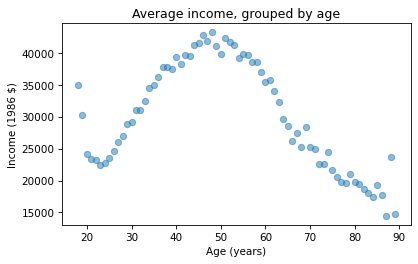

In [13]:
# group by age
import matplotlib.pyplot as plt

grouped = gss.groupby('age')
type(grouped)
mean_income_by_age = grouped['realinc'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Average income, grouped by age');

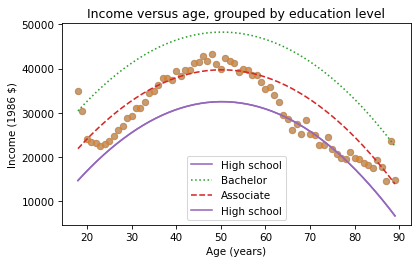

In [20]:
# Quadratic age and ed
import numpy as np

gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()
results.params

df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2

pred12 = results.predict(df)

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred12, label='High school', color='C4')

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)

df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred16, ':', label='Bachelor')
plt.plot(df['age'], pred14, '--', label='Associate')
plt.plot(df['age'], pred12, label='High school', color='C4')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Income versus age, grouped by education level')
plt.legend();

In [21]:
#categorical - sex

formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept       -24635.767539
C(sex)[T.2.0]    -4891.439306
educ              -496.623120
educ2              156.898221
age               1720.274097
age2               -17.097853
dtype: float64

Optimization terminated successfully.
         Current function value: 0.544026
         Iterations 5


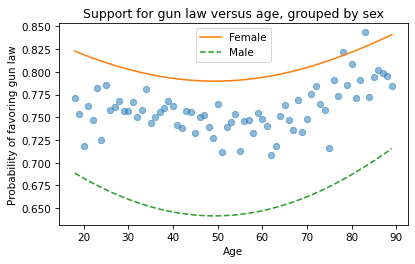

In [25]:
#
gss['gunlaw'] = gss['gunlaw'].replace([2], [0]) # make binary 0 = no, 1= yes
gss['gunlaw'].value_counts()
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

df['sex'] = 1
pred_male = results.predict(df)
df['sex'] = 2
pred_female = results.predict(df)

grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()

plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred_female, label='Female')
plt.plot(df['age'], pred_male, '--', label='Male')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.title('Support for gun law versus age, grouped by sex')
plt.legend();